<a href="https://colab.research.google.com/github/akars20/ai-visual-search/blob/alpi%2Fpreprocess/preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
!git clone https://github.com/akars20/ai-visual-search.git
%cd ai-visual-search


Cloning into 'ai-visual-search'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 6 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (6/6), 313.13 KiB | 4.89 MiB/s, done.
/content/ai-visual-search


In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install pyzipper




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 26.9 MB/s eta 0:00:00


In [56]:
import os
import pyzipper

# Set up your project directory in Colab
project_dir = '/content/ai-visual-search/'
if not os.path.exists(project_dir):
    os.makedirs(project_dir)

password = b"mmlab_DeepFashion_consumer2shop"  # Password as bytes



In [ ]:
# Unzip the images from the zip file into your project directory
img_zip_path = '/content/drive/MyDrive/Colab Notebooks/COMP4471 Project/deepfashion/img.zip'

with pyzipper.AESZipFile(img_zip_path, 'r') as zf:
    zf.setpassword(password)
    zf.extractall(project_dir)

print("Extraction complete!")

In [64]:
# Check the extracted directory structure
extracted_files = os.listdir(project_dir)
print("Extracted files and folders:", extracted_files)

# Check sample images inside the extracted folder
img_dir = project_dir # Adjust if necessary
if os.path.exists(img_dir):
    sample_images = os.listdir(img_dir)[:5]  # Display first 5 images
    print("Sample images:", sample_images)
else:
    print("Image folder not found! Check extraction path.")


Extracted files and folders: ['Anno', 'img', '.git', 'README.md']
Sample images: ['Anno', 'img', '.git', 'README.md']


In [65]:
anno_dir = os.path.join(project_dir, 'Anno')  # Annotation folder
eval_dir = os.path.join(project_dir, 'Eval')  # Evaluation folder


In [66]:
import shutil

# Define source (Google Drive) and destination (Colab)
anno_src = '/content/drive/MyDrive/Colab Notebooks/COMP4471 Project/deepfashion/Anno'
anno_dst = '/content/ai-visual-search/Anno'

# Copy the folder from Drive to Colab
shutil.copytree(anno_src, anno_dst, dirs_exist_ok=True)

print("Annotations copied successfully!")


Annotations copied successfully!


In [67]:
import pandas as pd

# Load and view the first few lines of bounding box annotations
bbox_path = os.path.join(anno_dir, 'list_bbox_consumer2shop.txt')

with open(bbox_path, 'r') as f:
    lines = f.readlines()[:10]  # Read first 10 lines
    for line in lines:
        print(line.strip())


239557
image_name clothes_type source_type x_1 y_1 x_2 y_2
img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg              1 1 001 039 200 292
img/CLOTHING/Polo_Shirt/id_00006282/comsumer_01.jpg          1 2 001 001 223 300
img/CLOTHING/Polo_Shirt/id_00006282/comsumer_02.jpg          1 2 001 001 169 230
img/CLOTHING/Polo_Shirt/id_00006282/comsumer_03.jpg          1 2 006 008 215 300
img/CLOTHING/Polo_Shirt/id_00006282/comsumer_04.jpg          1 2 001 001 225 300
img/CLOTHING/Polo_Shirt/id_00006695/comsumer_01.jpg          1 2 037 066 164 211
img/CLOTHING/Polo_Shirt/id_00006695/comsumer_02.jpg          1 2 064 056 158 181
img/CLOTHING/Polo_Shirt/id_00006695/shop_01.jpg              1 1 010 060 178 259


In [68]:
import pandas as pd

bbox_path = '/content/ai-visual-search/Anno/list_bbox_consumer2shop.txt'

# Read the file, skipping the first two rows (metadata), and specifying the delimiter
bbox_df = pd.read_csv(bbox_path, sep='\s+', skiprows=2, names=["image_name", "clothes_type", "source_type", "x_1", "y_1", "x_2", "y_2"])

# Display the first few rows
print(bbox_df.head())


                                          image_name  clothes_type  \
0    img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg             1   
1  img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...             1   
2  img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...             1   
3  img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...             1   
4  img/CLOTHING/Polo_Shirt/id_00006282/comsumer_0...             1   

   source_type  x_1  y_1  x_2  y_2  
0            1    1   39  200  292  
1            2    1    1  223  300  
2            2    1    1  169  230  
3            2    6    8  215  300  
4            2    1    1  225  300  


img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg
Image path: /content/ai-visual-search/img/CLOTHING/Polo_Shirt/id_00006282/shop_01.jpg


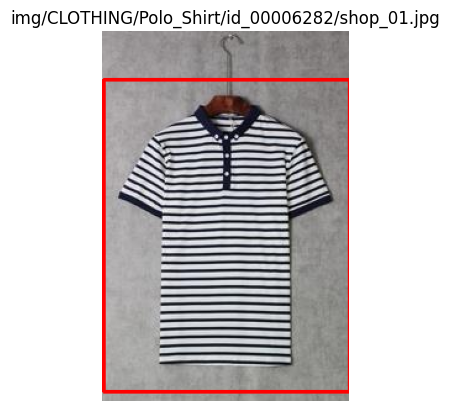

In [70]:
import cv2
import matplotlib.pyplot as plt

# Function to display images
def display_image_with_bbox(image_name):
    img_path = os.path.join(img_dir, image_name)
    print("Image path:", img_path)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Get bounding box for the selected image
    bbox = bbox_df[bbox_df['image_name'] == image_name].iloc[0]
    x1, y1, x2, y2 = bbox['x_1'], bbox['y_1'], bbox['x_2'], bbox['y_2']

    # Draw bounding box
    cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)

    # Show image
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_name)
    plt.show()

# Show an example image
print(bbox_df.iloc[0]['image_name'])
sample_image_name = bbox_df.iloc[0]['image_name']
display_image_with_bbox(sample_image_name)


In [73]:
# Navigate to project directory
%cd /content/ai-visual-search/

# Make sure you're on the correct branch
!git checkout alpi/preprocess


/content/ai-visual-search
Branch 'alpi/preprocess' set up to track remote branch 'alpi/preprocess' from 'origin'.
Switched to a new branch 'alpi/preprocess'


In [77]:


# Add, commit, and push your changes
!git add .
!git commit -m "data setup, initial exploration"
!git push origin alpi/preprocess

Author identity unknown

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@f840e0da7660.(none)')
fatal: could not read Username for 'https://github.com': No such device or address
